### Carregando o modelo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import json
import string
import spacy
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [2]:
from keras.models import load_model

In [68]:
def loadModel():
    name = input('escreva o nome do modelo a ser carregado:')
    savedModel = load_model(name+'.h5')
    with open('wordIndex.json') as f:
        dicto = json.load(f)
    savedModel.summary()
    return savedModel, dicto

In [69]:
tokenizer = Tokenizer()
model, tokenizer.word_index = loadModel()

escreva o nome do modelo a ser carregado:normal-trunc-150e500-1dense-100-1-acc96
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 100)          9235900   
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 9,316,401
Trainable params: 80,501
Non-trainable params: 9,235,900
_________________________________________________________________


### Notícias analisadas - True

In [70]:
true=[]
for i in range(1,54):
    try:
        with open(r'C:\Users\vitor\Documents\TCC.v3\3.noticias_true_maio22\\'+str(i)+'.txt', encoding ="utf8") as t:
            true.append(t.read())
    except:
        pass

In [71]:
labels = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1]
len(labels)

53

In [72]:
 df = pd.DataFrame(list(zip(true,labels)),columns=['true','labels'])

### Preprocessing

In [73]:
# Carregando o pacote de língua portuguesa para o processador Spacy
nlp = spacy.load('pt_core_news_sm')

In [74]:
# Defininido funções de preprocessamento

def removePunct(text):
    '''
    Removes any punctuation included in string.punctuation.
    '''
    translator = text.maketrans({key:'' for key in string.punctuation+'“”'}) # Translates any punctuation into ''
    return text.translate(translator)

def removeNumbers(text):
    '''
    Removes any number character in text.
    '''
    return re.sub('[0-9]', '' , text) # Translates any number into ''

def removeStopWords(string):
    '''
    Removes any portuguese stopwords, using Spacy's standard package.
    '''
    doc = nlp(string)
    return ' '.join([token.text for token in doc if token.is_stop is False])

def lemmatize(string):
    '''
    Lemmatizes text word-by-word. Notice that lemmatizing is not as harsh as stemming, which makes the final text easier to read and understand in common language.
    '''
    doc = nlp(string)
    return ' '.join([token.lemma_ for token in doc])

def prep(string, useStopWords = False, lemma = False):
    '''
    Executes previously defined preprocessing in text.
    '''

    result = removeNumbers(removePunct(string)).lower()
    
    if useStopWords and lemma:
        doc = nlp(result)
        result = ' '.join([token.lemma_ for token in doc if token.is_stop is False])
    elif useStopWords:
        doc = nlp(result)
        result = ' '.join([token.text for token in doc if token.is_stop is False])
    elif lemma:
        doc = nlp(result)
        result = ' '.join([token.lemma_ for token in doc])

    result = result.replace('\n',"")
    
    return result

In [75]:
sentence_t = df['true'].apply(prep)

In [76]:
sentence_t[0]

'o presidente jair bolsonaro disse que caso avance na disputa irá participar de debates somente no segundo turno das eleições deste ano em entrevista ao apresentador carlos massa o ratinho em seu programa de rádio e televisão que foi ao ar nesta terçafeira bolsonaro falou ainda sobre terceira via desistência de joão doria e alianças— no segundo turno eu vou participar no primeiro turno a gente pensa porque se eu for os  candidatos vão querer dar pancada em mim e eu não vou ter tempo para responder eu acho que o debate deveria ser perguntas préacertadas antes para não baixar o nível — disse bolsonaro ao apresentadora última pesquisa do datafolha apontou que o expresidente luiz inácio lula da silva pt segue na liderança da corrida pela presidência com bolsonaro pl na segunda colocação lula aparece com  das intenções de voto enquanto bolsonaro tem  a margem de erro é de dois pontos para mais ou para menosquestionado pelo apresentador acerca de sua opinião em relação à saída de joão doria 

### Classificação Trues

In [77]:
lista_t = []
lista_t.append(sentence_t)
lista_t

[0     o presidente jair bolsonaro disse que caso ava...
 1     a comissão de constituição e justiça da câmara...
 2     os deputados anunciaram na mesma sessão um aco...
 3     a comissão da constituição e justiça ccj do se...
 4     o centro de contingência do coronavírus no est...
 5     o expresidente luiz inácio lula da silva pt pr...
 6     o presidente do banco central roberto campos n...
 7     o expresidente luiz inácio lula da silva pt af...
 8     o ministro dias toffoli do supremo tribunal fe...
 9     o ministério público de contas de minas gerais...
 10    a câmara dos deputados aprovou nesta quartafei...
 11    o précandidato ao governo de são paulo tarcísi...
 12    a câmara dos deputados aprovou nesta quartafei...
 13    o plenário do senado aprovou nesta quartafeira...
 14    o partido rede sustentabilidade apresentou nes...
 15    o jornalista ribamar oliveira que morreu no an...
 16    o primogênito do presidente jair bolsonaro pl ...
 17    a comissão de direitos h

In [81]:
maxlen = 500
sequences_t = tokenizer.texts_to_sequences(sentence_t)
padded_t = pad_sequences(sequences_t, maxlen=maxlen, padding='post',truncating='pre')

In [82]:
for i in range(0,50):
    print(len(sequences_t[i]))

200
372
318
599
177
194
317
432
258
520
181
223
346
538
268
358
247
473
358
189
403
178
235
903
283
321
310
159
450
442
294
1482
573
797
1351
1194
1711
354
445
380
251
270
368
210
434
365
454
218
546
454


In [83]:
y_pred = (model.predict(padded_t) >=0.5).astype(int)

In [85]:
for i in range(0,50):
    print(y_pred[i])

[1]
[0]
[1]
[0]
[1]
[1]
[0]
[0]
[1]
[0]
[1]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[1]
[0]
[0]


In [86]:
print(accuracy_score(labels, y_pred))
print(precision_score(labels, y_pred))
print(recall_score(labels, y_pred))
print(f1_score(labels, y_pred))

0.5283018867924528
0.0
0.0
0.0


In [87]:
cm = tf.math.confusion_matrix(labels=labels,predictions=y_pred)

Text(69.0, 0.5, 'Truth')

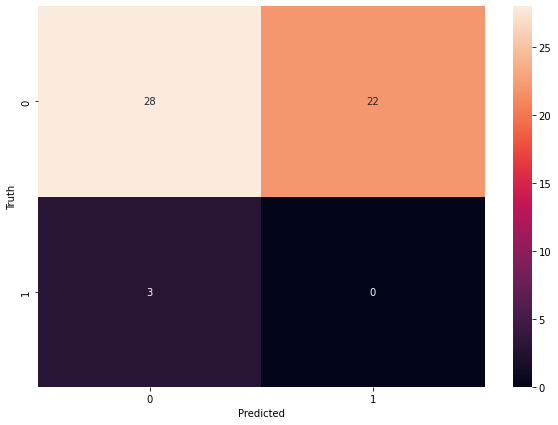

In [88]:
plt.figure(figsize= (10,7))
sns.heatmap(data=cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Classificação Fakes

In [82]:
lista_f = []
lista_f.append(sentence_f)
lista_f

['quatro expresidentes presos até é o que a lava jato está preparando a força tarefa da operação lava jato está com farto material acusatório para levar para a cadeia simultaneamente expresidentes do brasil lula dilma temer e collor podem terminar sua vida política atrás das gradesa condenação de lula acendeu o alerta vermelho em políticos que se achavam intocáveis a operação lava jato ao condenar o maior líder político da esquerda no brasil demonstrou que nenhuma pessoa está acima da leia condenação a nove anos e seis meses de prisão pelo juiz federal sergio moro nesta quartafeira não mandará o petista automaticamente para a cadeia isso porque moro é um juiz de primeira instância e assim sua decisão não basta para que a pena seja cumprida imediatamentetoda decisão que o \x93juiz da lava jato\x94 toma em primeira instância é depois revisada em segunda instância pelos desembargadores do tribunal regional da a região trf joão pedro gebran neto relator da operação leandro paulsen e victor

In [103]:
maxlen = 100
sequences_f = tokenizer.texts_to_sequences(lista_f)
padded_f = pad_sequences(sequences_f, maxlen=maxlen)

In [104]:
model.predict(padded_f)

array([[0.9640597]], dtype=float32)

In [85]:
(model.predict(padded_f) >=0.5).astype(int)

array([[1]])